In [35]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/SmartInternz/Project/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [36]:
import sys
sys.executable

'/Users/vinaymoolya/miniforge3/envs/vinay/bin/python'

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [38]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [40]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
paths = []
label  = []

for i in labels:
    folderPath = os.path.join('/Users/vinaymoolya/Desktop/projects/SmartInternz/Project/Dataset/Training',i)
    paths.append(folderPath)
    label.append(i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/Users/vinaymoolya/Desktop/projects/SmartInternz/Project/Dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

data ={
    'Path':paths,
    'label':label
}
df = pd.DataFrame(data)

df.to_csv('dataset.csv',index=False)
display(df)

,Path,label
0,/Users/vinaymoolya/Desktop/projects/SmartInter...,glioma_tumor
1,/Users/vinaymoolya/Desktop/projects/SmartInter...,meningioma_tumor
2,/Users/vinaymoolya/Desktop/projects/SmartInter...,no_tumor
3,/Users/vinaymoolya/Desktop/projects/SmartInter...,pituitary_tumor


In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2023-06-21 22:38:13.102202: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


83/83 [==============================] - 36s 385ms/step - loss: 1.9551 - accuracy: 0.2932 - val_loss: 1.3691 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 33s 398ms/step - loss: 1.3515 - accuracy: 0.3031 - val_loss: 1.3671 - val_accuracy: 0.2789
Epoch 3/20
83/83 [==============================] - 34s 412ms/step - loss: 1.1377 - accuracy: 0.4991 - val_loss: 1.0760 - val_accuracy: 0.5306
Epoch 4/20
83/83 [==============================] - 31s 377ms/step - loss: 0.9266 - accuracy: 0.5899 - val_loss: 1.0920 - val_accuracy: 0.5578
Epoch 5/20
83/83 [==============================] - 30s 363ms/step - loss: 0.8100 - accuracy: 0.6614 - val_loss: 0.9236 - val_accuracy: 0.5850
Epoch 6/20
83/83 [==============================] - 29s 349ms/step - loss: 0.7016 - accuracy: 0.7106 - val_loss: 0.9153 - val_accuracy: 0.5850
Epoch 7/20
83/83 [==============================] - 29s 350ms/step - loss: 0.6382 - accuracy: 0.7219 - val_loss: 0.8917 - val_accuracy: 0.5884
Epoch 8/20

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
model.save('braintumor.h5')

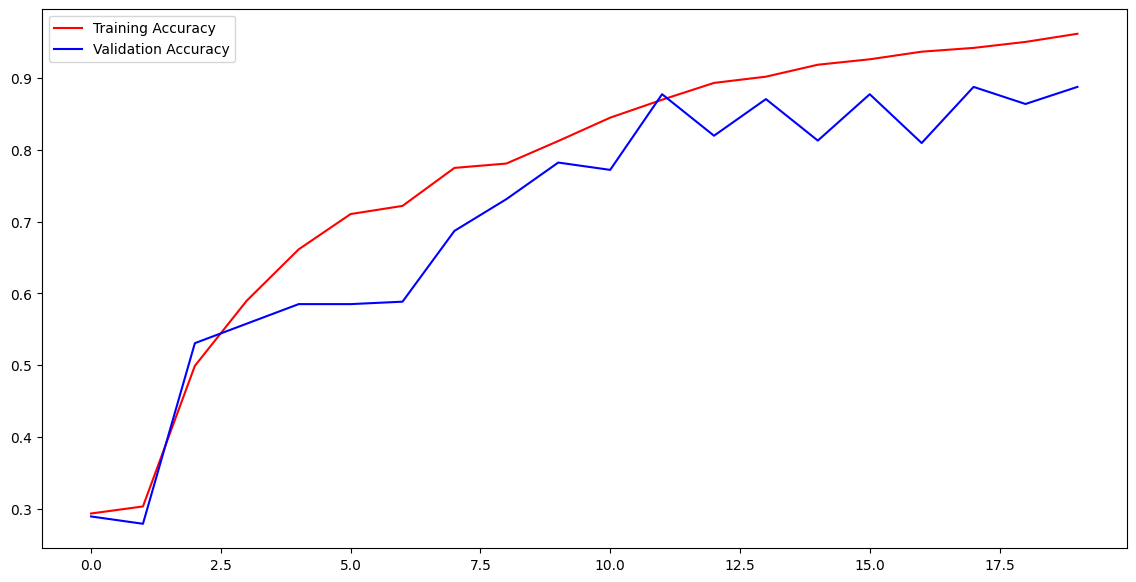

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

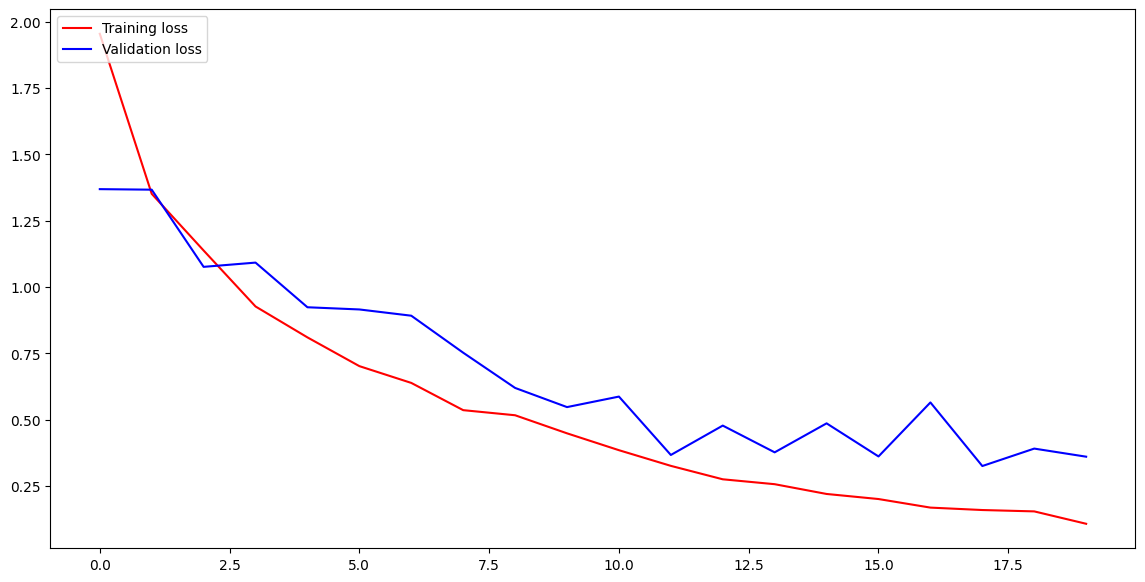

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [19]:
img = cv2.imread('Dataset/Testing/no_tumor/image(8).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [20]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

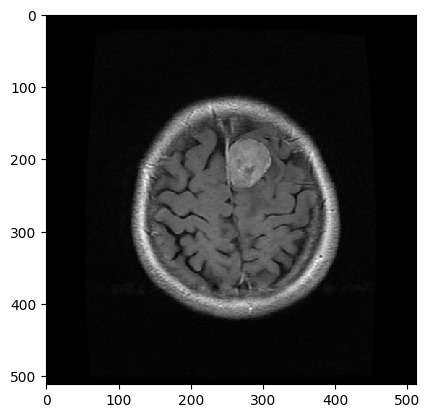

In [22]:
import tensorflow.keras.utils as image
img = image.load_img('/Users/vinaymoolya/Desktop/projects/SmartInternz/Project/Dataset/Training/meningioma_tumor/m (2).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
a=model.predict(img_array)
indices = a.argmax()
indices

2

0.0073869987

In [25]:
labels[indices]

'no_tumor'

## For Loaded Model

In [26]:
model1=tf.keras.models.load_model("braintumor.h5")

In [27]:
img = cv2.imread('Dataset/Testing/no_tumor/image(8).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [28]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

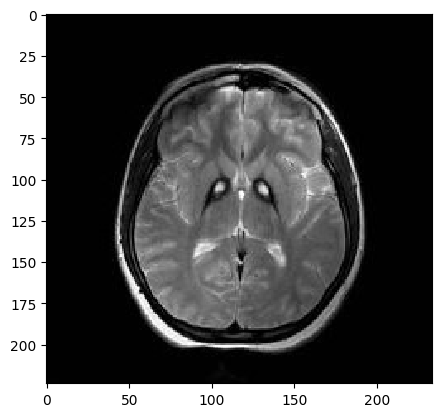

In [30]:
import tensorflow.keras.utils as image
img = image.load_img('Dataset/Testing/no_tumor/image(8).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [31]:
a=model1.predict(img_array)
indices = a.argmax()
indices

2

In [32]:
a

array([[7.3869987e-03, 2.3499401e-02, 9.6907300e-01, 4.0605384e-05]],
      dtype=float32)

In [33]:
labels[indices]

'no_tumor'